In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# define constants
IMG_H = 28
IMG_W = 28
NUM_DIGITS = 10
INTENSITY_THRESHOLD = 127

# read data
data_frame = pd.read_csv('C:/sagar/mnist/mnist_train.csv',dtype=np.int32,header=None)
NUM_TRAIN_IMAGES = data_frame.shape[0]
NUM_PIXELS = data_frame.shape[1]-1

In [2]:
NUM_PIXELS

784

In [3]:
# re-format data
def reformat_data(data_frame):
    np_data_frame = data_frame.values
    images = np_data_frame[:,1:]
    labels = np_data_frame[:,0]
    
    return [images, labels]

[images_train, labels_train] = reformat_data(data_frame)
labels_train

array([5, 0, 4, ..., 5, 6, 8])

In [4]:
data_frame.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [184]:
flat_images_train = images_train.flatten()

Text(0.5, 0, 'value')

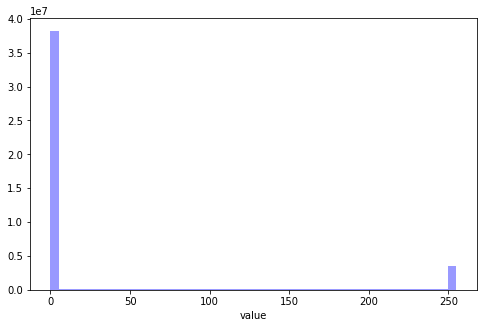

In [185]:
plt.figure(figsize=(8,5))
sns.distplot(flat_images_train, kde=False, color='blue')
plt.xlabel('count')
plt.xlabel('value')

In [186]:
data_frame = data_frame.rename(columns={0:'label'})
gb = data_frame.groupby(['label'])
# zero = gb.get_group(0)
# one = gb.get_group(1)
# two = gb.get_group(2)
# three = gb.get_group(3)
# four = gb.get_group(4)
# five = gb.get_group(5)
# six = gb.get_group(6)
# seven = gb.get_group(7)
# eight = gb.get_group(8)
# nine = gb.get_group(9)
new = []
for i in range(10):
    temp = gb.get_group(i)
    np_data_frame = temp.values
    images = np_data_frame[:,1:]
    num = len(images)
    images = np.sum(images, axis = 0, keepdims = True)
    images = images/num
    images = images.astype(int)
    new.append(images)

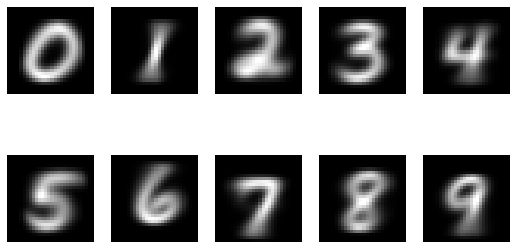

In [187]:
NUM_PLOTS = 10
plt.figure(figsize=(9,5))
for i in range(0,NUM_PLOTS):
    plt.subplot(2,5,i+1)
    plt.imshow(np.reshape(new[i],(IMG_H,IMG_W)),cmap='gray')
    plt.axis('off')

plt.show()

In [188]:
np_data_frame = data_frame.values
num = len(np_data_frame)
ed_arr = []
for i in range(num):
    val = np_data_frame[i][0]
    that_new = new[val]
    that_new = that_new[0]
    #print(that_new[0])
    orig = np_data_frame[i,1:]
    #print(orig)
    #print(len(orig), len(that_new))
    summ = 0
    for j in range(len(orig)):
        summ = summ + ((orig[j] - that_new[j]) * (orig[j] - that_new[j]))
    mean_summ = summ / len(orig)
    ed = np.sqrt(mean_summ)
    ed_arr.append(ed)
#print(ed_arr)
print(len(ed_arr))

60000


In [189]:
ed_arr = np.reshape(ed_arr, (num,1))
print(ed_arr.shape, data_frame.shape)
new_np_data_frame = np.append(np_data_frame, ed_arr, axis = 1)
new_np_data_frame = new_np_data_frame.astype(int)
new_data_frame = pd.DataFrame(new_np_data_frame)
new_data_frame = new_data_frame.rename(columns={0:'label'})
new_data_frame = new_data_frame.rename(columns={785:'Euclidean Distance'})
new_data_frame.head()

(60000, 1) (60000, 785)


,label,1,2,3,4,5,6,7,8,9,...,776,777,778,779,780,781,782,783,784,Euclidean Distance
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,60
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,47
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,64
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,48
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,48


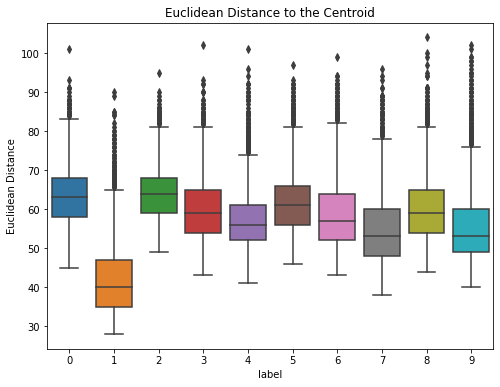

In [190]:
plt.figure(figsize=(8,6))
ax = sns.boxplot(x="label", y="Euclidean Distance", data=new_data_frame)
plt.title('Euclidean Distance to the Centroid')
ax

In [191]:
temp = []
gb = new_data_frame.groupby(['label'])
zero = gb.get_group(0).sort_values(by=['Euclidean Distance'], ascending = False).head(5).values
temp.append(zero)
one = gb.get_group(1).sort_values(by=['Euclidean Distance'], ascending = False).head(5).values
temp.append(one)
two = gb.get_group(2).sort_values(by=['Euclidean Distance'], ascending = False).head(5).values
temp.append(two)
three = gb.get_group(3).sort_values(by=['Euclidean Distance'], ascending = False).head(5).values
temp.append(three)
four = gb.get_group(4).sort_values(by=['Euclidean Distance'], ascending = False).head(5).values
temp.append(four)
five = gb.get_group(5).sort_values(by=['Euclidean Distance'], ascending = False).head(5).values
temp.append(five)
six = gb.get_group(6).sort_values(by=['Euclidean Distance'], ascending = False).head(5).values
temp.append(six)
seven = gb.get_group(7).sort_values(by=['Euclidean Distance'], ascending = False).head(5).values
temp.append(seven)
eight = gb.get_group(8).sort_values(by=['Euclidean Distance'], ascending = False).head(5).values
temp.append(eight)
nine = gb.get_group(9).sort_values(by=['Euclidean Distance'], ascending = False).head(5).values
temp.append(nine)

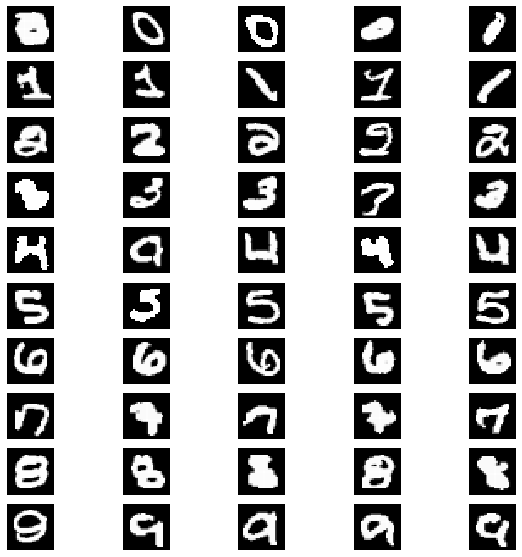

In [193]:
NUM_PLOTS = 10
q = 0
w = 0
fig=plt.figure(figsize=(10, 10))
columns = 5
rows = 10
for i in range(0, columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(np.reshape(temp[q][w,1:785],(IMG_H,IMG_W)),cmap='gray')
    w += 1
    if w % 5 == 0:
        w = w % 5
        q += 1  
    plt.axis('off')
plt.show()